In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from scipy import stats
import math
from scipy.sparse import csc_matrix
import random
import operator
import scipy.io
import collections
import heapq

import csv
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from math import log
from scipy import stats
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['figure.figsize'] = 4, 4
subSize=10000

In [2]:
from google.colab import files
uploaded = files.upload()

Saving edges.csv to edges.csv


In [4]:
Data = open('edges.csv', "r")
Graphtype = nx.Graph()

G = nx.parse_edgelist(Data, comments='t', delimiter=',', create_using=Graphtype,
                      nodetype=int, data=(('weight', float),))

In [0]:
def Degree_Distribution(GA):
    degree_sequence = sorted([d for n, d in GA.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Distribution")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show() 

def plot_clustering(GA):
  cluster = nx.clustering(GA)
  plt.hist(cluster.values())
  plt.xlabel("Clustering Coeficient")
  plt.ylabel("No of Nodes")
  plt.show()

def get_giant_cluster(GA):
  GC = max(nx.connected_component_subgraphs(GA), key=len)
  print("Nodes in giant cluster = " ,GC.number_of_nodes())


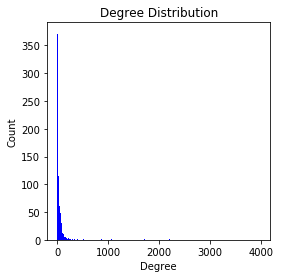

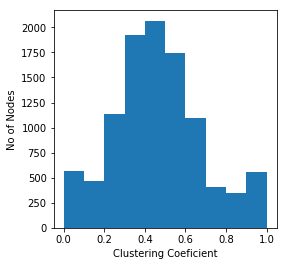

Nodes in giant cluster =  10312


KeyboardInterrupt: ignored

In [0]:
Degree_Distribution(G)
plot_clustering(G)
get_giant_cluster(G)

Name: 
Type: Graph
Number of nodes: 10312
Number of edges: 333983
Average degree:  64.7756
10312
333983
False
0.4631956780330237


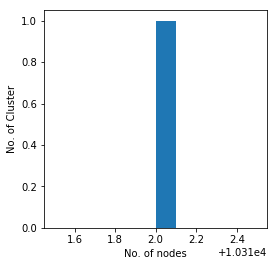

In [0]:
print(nx.info(G))
print(nx.number_of_nodes(G))
print(nx.number_of_edges(G))
print(nx.is_directed(G))
# print(nx.average_degree_connectivity(G))
# for C in nx.connected_component_subgraphs(G):
#     print(nx.average_shortest_path_length(C))
yg=[len(c) for c in nx.connected_component_subgraphs(G)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(yg)
print(nx.average_clustering(G))

In [0]:
G_CN = G.copy()
print(nx.info(G_CN))
G_JC = G.copy()
print(nx.info(G_JC))
G_AA = G.copy()
print(nx.info(G_AA))
G_RA = G.copy()
print(nx.info(G_RA))
G_PA = G.copy()
print(nx.info(G_PA))

Name: 
Type: Graph
Number of nodes: 10312
Number of edges: 333983
Average degree:  64.7756
Name: 
Type: Graph
Number of nodes: 10312
Number of edges: 333983
Average degree:  64.7756
Name: 
Type: Graph
Number of nodes: 10312
Number of edges: 333983
Average degree:  64.7756
Name: 
Type: Graph
Number of nodes: 10312
Number of edges: 333983
Average degree:  64.7756
Name: 
Type: Graph
Number of nodes: 10312
Number of edges: 333983
Average degree:  64.7756


In [6]:
total_edges=list(G.edges())
methods=['CN','JC','AA','RA','PA','KZ','RP']
allm={m:{} for m in methods}


In [0]:

for p in total_edges:
        n1,n2=p
        ngh1 = set(G[n1])
        ngh2 = set(G[n2])
        inter = ngh1.intersection(ngh2) # ngh1 & ngh2
        inter_l = len(inter)
        union_l = len(ngh1.union(ngh2)) #ngh1 | ngh2            
        
        allm['CN'][p]=inter_l
        allm['JC'][p]=(inter_l/union_l) if union_l else 0.0
        allm['AA'][p]=sum([1/log(len(G[z])) for z in inter]) # denom cant be zero as atleast 2 edges
        allm['RA'][p]=sum([1/len(G[z]) for z in inter])
        allm['PA'][p]=len(ngh1)*len(ngh2)
        


In [0]:
Existing={}
for m in methods:
    Existing[m] = sorted([(e,allm[m][e]) for e in total_edges],key=lambda x:x[1],reverse=True)

0.06885971728334217


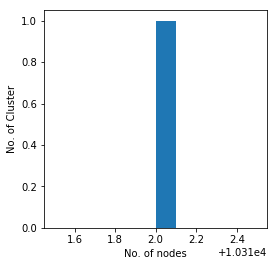

In [0]:
G_CN.remove_edges_from([i[0] for i in Existing['CN'][:100000]])
#print(nx.average_degree_connectivity(G_CN))
# for C in nx.connected_component_subgraphs(G_CN):
#     print(nx.average_shortest_path_length(C))
x=[len(c) for c in nx.connected_component_subgraphs(G_CN)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(x)
print(nx.average_clustering(G_CN))

0.13110953980015427


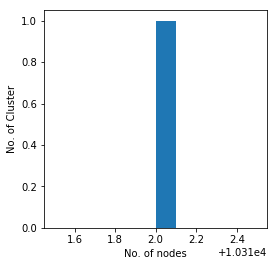

In [0]:
G_JC.remove_edges_from([i[0] for i in Existing['JC'][:100000]])
#print(nx.average_degree_connectivity(G_JC))
# for C in nx.connected_component_subgraphs(G_JC):
#     print(nx.average_shortest_path_length(C))
y=[len(c) for c in nx.connected_component_subgraphs(G_JC)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(y)
print(nx.average_clustering(G_JC))

0.0619709796228059


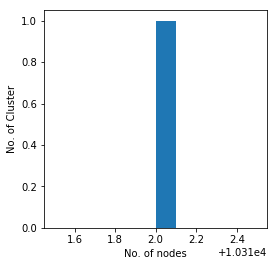

In [0]:
G_AA.remove_edges_from([i[0] for i in Existing['AA'][:100000]])
#print(nx.average_degree_connectivity(G_AA))
# for C in nx.connected_component_subgraphs(G_AA):
#     print(nx.average_shortest_path_length(C))
ya=[len(c) for c in nx.connected_component_subgraphs(G_AA)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(ya)
print(nx.average_clustering(G_AA))

0.07343092848462593


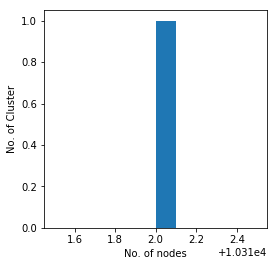

In [0]:
G_PA.remove_edges_from([i[0] for i in Existing['PA'][:100000]])
#print(nx.average_degree_connectivity(G_PA))
# for C in nx.connected_component_subgraphs(G_PA):
#     print(nx.average_shortest_path_length(C))
yp=[len(c) for c in nx.connected_component_subgraphs(G_PA)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(yp)
print(nx.average_clustering(G_PA))

0.028196369929399157


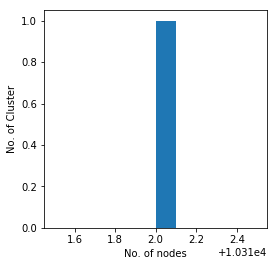

In [0]:
G_RA.remove_edges_from([i[0] for i in Existing['RA'][:100000]])
#print(nx.average_degree_connectivity(G_RA))
for C in nx.connected_component_subgraphs(G_RA):
    print(nx.average_shortest_path_length(C))
yr=[len(c) for c in nx.connected_component_subgraphs(G_RA)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(yr)
print(nx.average_clustering(G_RA))

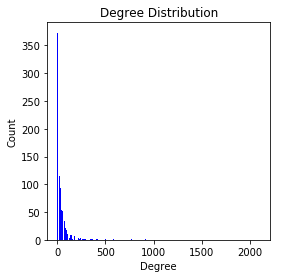

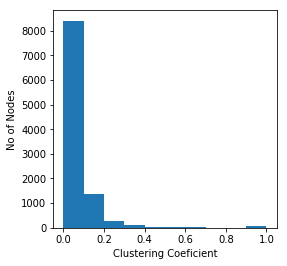

Nodes in giant cluster =  10312


In [0]:
Degree_Distribution(G_CN)
plot_clustering(G_CN)
get_giant_cluster(G_CN)

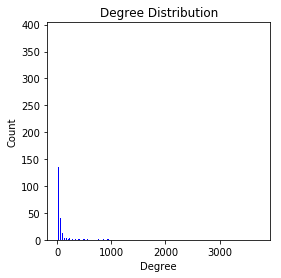

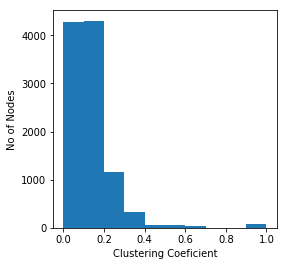

Nodes in giant cluster =  10312


In [0]:
Degree_Distribution(G_JC)
plot_clustering(G_JC)
get_giant_cluster(G_JC)

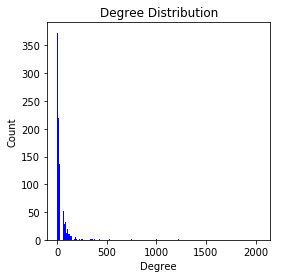

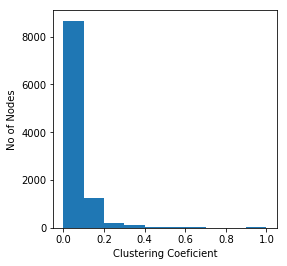

Nodes in giant cluster =  10312


In [0]:
Degree_Distribution(G_AA)
plot_clustering(G_AA)
get_giant_cluster(G_AA)

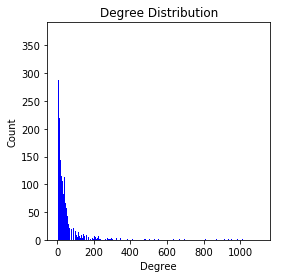

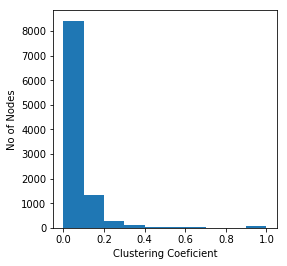

Nodes in giant cluster =  10312


In [0]:
Degree_Distribution(G_PA)
plot_clustering(G_PA)
get_giant_cluster(G_PA)

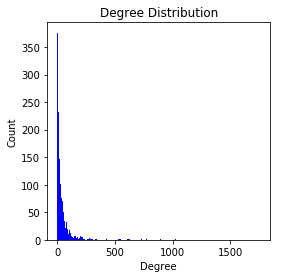

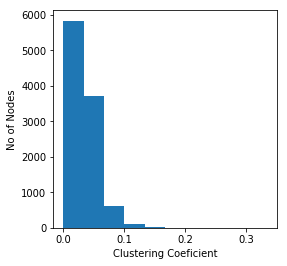

Nodes in giant cluster =  10312


In [0]:
Degree_Distribution(G_RA)
plot_clustering(G_RA)
get_giant_cluster(G_RA)

In [0]:
print("Nodes in island = " , nx.number_connected_components(G))
print("Nodes in island = " , nx.number_connected_components(G_CN))
print("Nodes in island = " , nx.number_connected_components(G_JC))
print("Nodes in island = " , nx.number_connected_components(G_AA))
print("Nodes in island = " , nx.number_connected_components(G_RA))
print("Nodes in island = " , nx.number_connected_components(G_PA))


Nodes in island =  1
Nodes in island =  1
Nodes in island =  1
Nodes in island =  1
Nodes in island =  1
Nodes in island =  1


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([10311.5, 10311.6, 10311.7, 10311.8, 10311.9, 10312. , 10312.1,
        10312.2, 10312.3, 10312.4, 10312.5]),
 <a list of 10 Patch objects>)

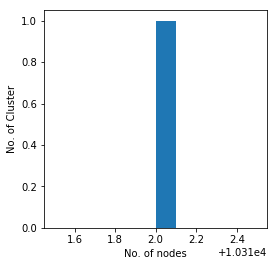

In [0]:
y=[len(c) for c in nx.connected_component_subgraphs(G_JC)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(y)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([10311.5, 10311.6, 10311.7, 10311.8, 10311.9, 10312. , 10312.1,
        10312.2, 10312.3, 10312.4, 10312.5]),
 <a list of 10 Patch objects>)

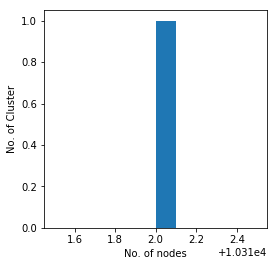

In [0]:
yg=[len(c) for c in nx.connected_component_subgraphs(G_AA)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(yg)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([10311.5, 10311.6, 10311.7, 10311.8, 10311.9, 10312. , 10312.1,
        10312.2, 10312.3, 10312.4, 10312.5]),
 <a list of 10 Patch objects>)

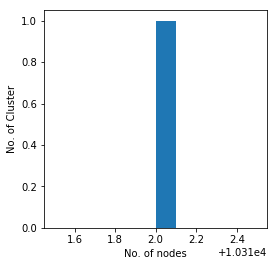

In [0]:
yg=[len(c) for c in nx.connected_component_subgraphs(G_CN)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(yg)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([10311.5, 10311.6, 10311.7, 10311.8, 10311.9, 10312. , 10312.1,
        10312.2, 10312.3, 10312.4, 10312.5]),
 <a list of 10 Patch objects>)

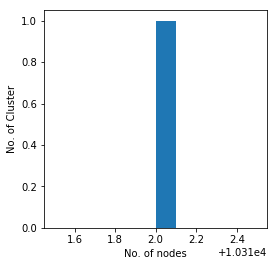

In [0]:
yg=[len(c) for c in nx.connected_component_subgraphs(G_PA)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(yg)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([10311.5, 10311.6, 10311.7, 10311.8, 10311.9, 10312. , 10312.1,
        10312.2, 10312.3, 10312.4, 10312.5]),
 <a list of 10 Patch objects>)

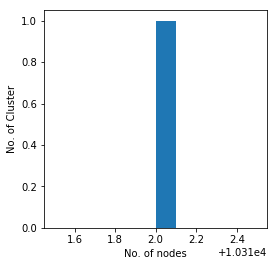

In [0]:
yg=[len(c) for c in nx.connected_component_subgraphs(G_RA)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(yg)

In [0]:
for C in nx.connected_component_subgraphs(G_CN):
    print(nx.average_shortest_path_length(C))
for C in nx.connected_component_subgraphs(G_JC):
    print(nx.average_shortest_path_length(C))
for C in nx.connected_component_subgraphs(G_AA):
    print(nx.average_shortest_path_length(C))
for C in nx.connected_component_subgraphs(G_RA):
    print(nx.average_shortest_path_length(C))
for C in nx.connected_component_subgraphs(G_PA):
    print(nx.average_shortest_path_length(C))            

2.6046527471960284
2.4272320325841505
2.611849581205276
2.6476208232728626
2.7082501842052733


In [0]:
for C in nx.connected_component_subgraphs(G):
    print(nx.average_shortest_path_length(C)) 

KeyboardInterrupt: ignored

In [ ]:


def rooted_pagerank(g, node, d = 0.85, epsilon = 1e-4):
    """ Returns rooted pagerank vector
    g graph
    node root
    d damping coefficient
    """
    ordered_nodes = sorted(g.nodes())
    root = ordered_nodes.index(node)
    adjecancy = nx.to_numpy_array(g, nodelist = ordered_nodes)
    m = np.copy(adjecancy)

    n = len(g)

    for i in range(len(g)):
        row_norm = np.linalg.norm(m[i], ord = 1)
        if row_norm != 0:
            m[i] = m[i] / row_norm

    m = m.transpose()

    rootvec = np.zeros(len(g))
    rootvec[root] = 1

    vect = np.random.rand(n)
    vect = vect / np.linalg.norm(vect, ord = 1)
    last_vect = np.ones(n) * 100 # to ensure that does not hit epsilon randomly in first step

    iterations = 0
    while np.linalg.norm(vect - last_vect, ord = 2) > epsilon:
        last_vect = vect.copy()
        vect = d * np.matmul(m, vect) + (1 - d) * rootvec
        iterations += 1

    eigenvector = vect / np.linalg.norm(vect, ord = 1)

    eigen_dict = {}
    for i in range(len(ordered_nodes)):
        eigen_dict[ordered_nodes[i]] = eigenvector[i]

    return eigen_dict

for g in G.nodes():
        aa = rooted_pagerank(G, g)
        for v in G.neighbors(g):
          p = (g,v)
          allm['RP'][p] = aa[v]


In [ ]:
Existing={}
Existing['RP'] = sorted([(e,allm['RP'][e]) for e in total_edges],key=lambda x:x[1],reverse=True)
def Degree_Distribution(GA):
    degree_sequence = sorted([d for n, d in GA.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Distribution")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show() 

def plot_clustering(GA):
  cluster = nx.clustering(GA)
  plt.hist(cluster.values())
  plt.xlabel("Clustering Coeficient")
  plt.ylabel("No of Nodes")
  plt.show()

def get_giant_cluster(GA):
  GC = max(nx.connected_component_subgraphs(GA), key=len)
  print("Nodes in giant cluster = " ,GC.number_of_nodes())
  
G_RP = G.copy()
# top 30000 edges removed of each method and properties analysed
G_RP.remove_edges_from([i[0] for i in Existing['RP'][:30000]])
# for C in nx.connected_component_subgraphs(G_RP):
#     print(nx.average_shortest_path_length(C))
print(nx.average_clustering(G_RP))
Degree_Distribution(G_RP)
plot_clustering(G_RP)
get_giant_cluster(G_RP)
print("number of connected components = " , nx.number_connected_components(G_RP))

y=[len(c) for c in nx.connected_component_subgraphs(G_RP)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(y)

In [ ]:
for C in nx.connected_component_subgraphs(G_RP):
    print(nx.average_shortest_path_length(C))